##### Imbalanced data refers to a situation where the distribution of classes in the
##### target variable is not equal or significantly skewed. In other words, one
##### class has significantly more examples than the other classes. Imbalanced
##### data can lead to biased machine learning models, as they tend to favor the
##### majority class and perform poorly on the minority class.

In [2]:
 import pandas as pd
 url = 'https://raw.githubusercontent.com/kittenpub/database-repository/main/Customer_Churn_Modelling.csv'
 df = pd.read_csv(url)
 # Assuming 'target_column' is the name of the target variable
 print(df['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

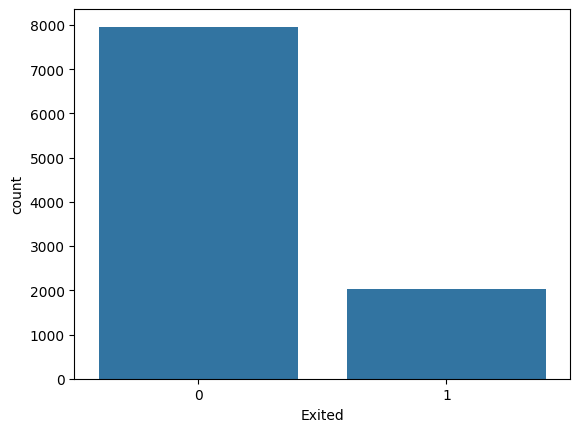

In [5]:
sns.countplot(x=df['Exited'])

In [9]:
# Import necessary libraries
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Separate the majority and minority classes

df_majority = df[df['Exited'] == 0]
df_minority = df[df['Exited'] == 1]

# Upsampling the minority class
df_minority_upsampled = resample(df_minority, replace=True,n_samples=len(df_majority), random_state=42)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Downsampling the majority class
df_majority_downsampled = resample(df_majority,replace=False, n_samples=len(df_minority), random_state=42)
df_downsampled = pd.concat([df_majority_downsampled,df_minority])



In [10]:
df_upsampled

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5701,5702,15724154,Manna,625,Germany,Female,49,4,128504.76,1,1,0,126812.63,1
9337,9338,15797751,Pai,466,Germany,Female,47,5,102085.72,1,1,1,183536.24,1
4345,4346,15584536,Barber,720,Germany,Male,46,3,97042.60,1,1,1,133516.51,1
1085,1086,15646513,Spyer,803,France,Male,42,5,0.00,1,1,0,196466.83,1


In [11]:
df_upsampled['Exited'].value_counts()

Exited
0    7963
1    7963
Name: count, dtype: int64

In [12]:
df_downsampled

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,8166,15813503,Pickering,606,Spain,Male,37,8,154712.58,2,1,0,89099.18,0
6409,6410,15690695,Flynn,683,France,Female,33,9,0.00,2,1,1,38784.42,0
2157,2158,15750649,Uwakwe,744,France,Female,44,3,0.00,2,1,1,189016.14,0
1618,1619,15662955,Nicholls,697,France,Male,27,8,141223.68,2,1,0,90591.15,0
1633,1634,15755868,Farmer,562,France,Male,35,7,0.00,1,0,0,48869.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [13]:
df_downsampled['Exited'].value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
df = df.drop('Surname', axis=1)
# Load your DataFrame
# df = pd.read_csv('your_file.csv')  # Uncomment and modify this line to load your dataset

# Encoding categorical variables
label_encoders = {}
categorical_cols = ['Geography', 'Gender']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate the features and the target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Optionally, decode the encoded columns back to original labels (if needed)
for col, le in label_encoders.items():
    X_smote[col] = le.inverse_transform(X_smote[col])

# Check the shape of the resampled dataset
print("Original dataset shape:", df.shape)
print("Resampled dataset shape:", X_smote.shape, y_smote.shape)
print("Class distribution after applying SMOTE:\n", pd.Series(y_smote).value_counts())

# Convert back to DataFrame (if needed)
df_smote = pd.DataFrame(X_smote, columns=X.columns)
df_smote['Exited'] = y_smote


Original dataset shape: (10000, 13)
Resampled dataset shape: (15926, 12) (15926,)
Class distribution after applying SMOTE:
 Exited
1    7963
0    7963
Name: count, dtype: int64
